## Capstone Project

### Data Section

For this project  2020 fuel economy data from the office of Energy efficiency & Renewable energy will be used ( https://fueleconomy.gov/feg/download.shtml).The data has 18 columns (variables) with 2410 observations(rows).   Columns containing data irrelevant for the project (such as ‘certification regions’ and ‘underhood ID’) will be omitted during the data cleaning process. Rows containing vehicles operating with electricity and hydrogen will also be omitted as they are "SmartWay vehicles" by defualt. 

The crude data will roughly look like the following.

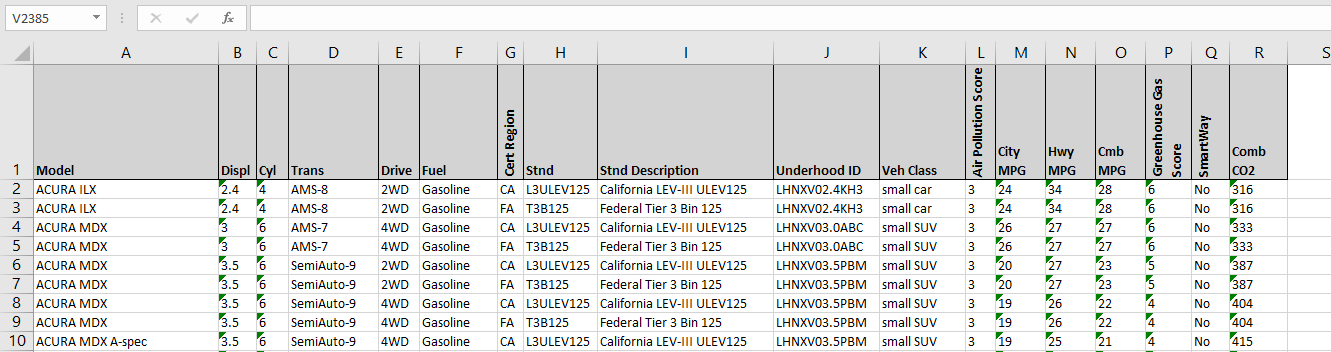

The entire rows of columns containing missing values will be dropped. Some of the categorical variables with string values will be assigned dummy numbers to convert them into continuous variable.

Upon reading the file with pandas data frame, the first 10 rows will look like the following.

In [2]:
import pandas as pd
df = pd.read_excel('Data/all_alpha_20.xlsx')
df.head(10)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387
5,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387
6,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,19,26,22,4,No,404
7,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.5PBM,small SUV,3,19,26,22,4,No,404
8,ACURA MDX A-spec,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,19,25,21,4,No,415
9,ACURA MDX A-spec,3.5,6.0,SemiAuto-9,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.5PBM,small SUV,3,19,25,21,4,No,415


### Column descriptions

__Model –__ vehicle make and model
<br>__Displ –__ engine displacement in liters
<br>__Cyl –__ number of engine cylinders
<br>__Trans –__ transmission type plus number of gears
- Auto - Automatic
- Man - Manual
- SemiAuto - Semi-Automatic
- SCV - Selectable Continuously Variable (e.g. CVT with paddles)
- AutoMan - Automated Manual
- AMS - Automated Manual-Selectable (e.g. Automated Manual with paddles)
- Other - Other
- CVT - Continuously Variable
- CM3 - Creeper/Manual 3-Speed
- CM4 - Creeper/Manual 4-Speed
- C4 - Creeper/Manual 4-Speed
- C5 - Creeper/Manual 5-Speed
- Auto-S2 - Semi-Automatic 2-Speed
- Auto-S3 - Semi-Automatic 3-Speed
- Auto-S4 - Semi-Automatic 4-Speed
- Auto-S5 - Semi-Automatic 5-Speed
- Auto-S6 - Semi-Automatic 6-Speed
- Auto-S7 - Semi-Automatic 7-Speed
<br>__Drive –__ 2-wheel Drive, 4-wheel drive/all-wheel drive
<br>__Fuel –__ fuel(s)
<br>__Cert Region –__
- CA - California
- CE - Calif. + NLEV (Northeast trading area)
- CF - Clean Fuel Vehicle
- CL - Calif. + NLEV (All states)
- FA - Federal All Altitude
- FC - Tier 2 Federal and Calif.
- NF - CFV + NLEV(ASTR) + Calif.
- NL - NLEV (All states)
<br>__Stnd –__ vehicle emissions standard code. See Stnd Description. 
<br>__Stnd Description –__ vehicle emissions standard description. See
https://www.epa.gov/greenvehicles/federal-and-california-light-duty-vehicle-emissions-standards-airpollutants
<br>__Underhood ID –__ engine family or test group ID. See
http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore
<br>__Veh Class –__ EPA vehicle class. See http://www.fueleconomy.gov/feg/findacarhelp.shtml#epaSizeClass
<br>__Air Pollution Score (Smog Rating) – __see
http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore and
https://www.epa.gov/greenvehicles/smog-rating
<br>__City MPG –__ city fuel economy in miles per gallon
<br>__Hwy MPG –__ highway fuel economy in miles per gallon
<br>__Cmb MPG –__ combined city/highway fuel economy in miles per gallon
<br>__Greenhouse Gas Score (Greenhouse Gas Rating) –__ see
https://www.epa.gov/greenvehicles/greenhouse-gas-rating
<br>__SmartWay –__ Yes, No, or Elite. See https://www.epa.gov/greenvehicles/consider-smartwayvehicle
<br>__Comb CO2 –__ combined city/highway CO2 tailpipe emissions in grams per mile